# **MODELADO PARA LA PRECIPITACIÓN EN EL ZÓCALO DE PUEBLA**



Precipitación v4:  
https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-monthly
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/


Nombres:  
https://www.ncei.noaa.gov/pub/data/ghcn/v4/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
data=pd.read_csv('MXN00021035.csv')

In [3]:
pre=data.iloc[:,6]  # Keep the 7th column (the one with the date)
date=data.iloc[:,5] # Keep the 6th column (the one with the temperature)
date = date.astype(str).str.replace(r'(\d{4})(\d{2})', r'\1/\2', regex=True)    # From 195210 to 1952/10 
date = pd.to_datetime(date, format='%Y/%m')# Convert the date column to datetime

In [4]:
date

0     1952-10-01
1     1952-11-01
2     1952-12-01
3     1953-04-01
4     1953-05-01
         ...    
667   2009-08-01
668   2009-09-01
669   2009-10-01
670   2009-11-01
671   2009-12-01
Name: 195209, Length: 672, dtype: datetime64[ns]

In [5]:
pre

0       174
1       592
2         0
3        47
4       137
       ... 
667    1474
668    3161
669    1190
670     155
671      51
Name:   1927, Length: 672, dtype: int64

In [6]:
pre = pd.Series(pre.values, index=date) # Create a new Series with the date as index
pre

195209
1952-10-01     174
1952-11-01     592
1952-12-01       0
1953-04-01      47
1953-05-01     137
              ... 
2009-08-01    1474
2009-09-01    3161
2009-10-01    1190
2009-11-01     155
2009-12-01      51
Length: 672, dtype: int64

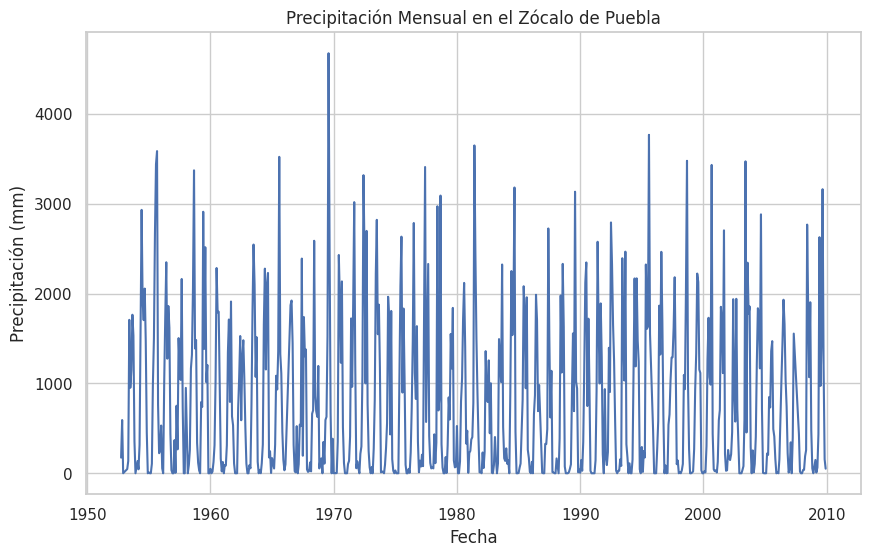

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(pre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en el Zócalo de Puebla")
plt.grid(True)
plt.show()

# **TRANSFORMACIÓN**

Definición **matemática** de la **transformación Yeo-Johnson**, como se encuentra en la literatura estadística (propuesta por Ingram Olkin y I. Paul Yeo & R. J. Johnson en 2000).

Sea $x \in \mathbb{R}$ un valor (puede ser negativo, cero o positivo). La transformación $T(x; \lambda)$ se define como:

$$
T(x; \lambda) =
\begin{cases}
\frac{[(x + 1)^\lambda - 1]}{\lambda} & \text{si } x \geq 0, \, \lambda \ne 0 \\
\log(x + 1) & \text{si } x \geq 0, \, \lambda = 0 \\
-\frac{[(-x + 1)^{2 - \lambda} - 1]}{2 - \lambda} & \text{si } x < 0, \, \lambda \ne 2 \\
-\log(-x + 1) & \text{si } x < 0, \, \lambda = 2
\end{cases}
$$

La **corrección de sesgo** en la transformación Yeo-Johnson es un detalle técnico importante cuando se usa con la opción `standardize=True` en `scikit-learn` y otras implementaciones.

Cuando transformás datos para que se parezcan a una distribución normal, podés terminar con una media y varianza que no están exactamente en 0 y 1. La **corrección de sesgo** es una **estandarización posterior** que asegura que los datos transformados tengan:

- media 0
- desviación estándar 1

Esto **no forma parte de la transformación Yeo-Johnson en sí**, sino que es un **post-procesamiento** adicional. Pero es importante cuando vas a usar modelos sensibles a escalas.

Supongamos que \( T(x_i; \lambda) \) es el valor transformado de \( x_i \). Entonces, la corrección de sesgo se hace con una estandarización clásica:

$$
z_i = \frac{T(x_i; \lambda) - \mu_T}{\sigma_T}
$$

donde:

- \( \mu_T = \frac{1}{n} \sum_{i=1}^{n} T(x_i; \lambda) \) es la **media** de los datos transformados
- \( \sigma_T = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (T(x_i; \lambda) - \mu_T)^2} \) es la **desviación estándar**

In [79]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Crear y ajustar el transformador Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson', standardize=True)
ypre = pt.fit_transform(pre.values.reshape(-1, 1))

In [80]:
# Obtener el valor lambda estimado
print("Lambda estimado:", pt.lambdas_)

Lambda estimado: [0.23801569]


In [ ]:
# Aplicar la transformación inversa
preo = pt.inverse_transform(ypre)

print("Original:")
print(pre.values.reshape(-1, 1))


Original:
[[ 174]
 [ 592]
 [   0]
 [  47]
 [ 137]
 [1707]
 [ 951]
 [1150]
 [1764]
 [1532]
 [ 354]
 [   0]
 [ 135]
 [  44]
 [ 315]
 [1638]
 [2931]
 [1913]
 [1704]
 [2055]
 [1478]
 [ 451]
 [   0]
 [  10]
 [   0]
 [   0]
 [ 106]
 [ 992]
 [1505]
 [2663]
 [3438]
 [3585]
 [ 766]
 [ 223]
 [ 254]
 [ 531]
 [  55]
 [   0]
 [1030]
 [1730]
 [2348]
 [1275]
 [1861]
 [1619]
 [ 439]
 [  34]
 [   0]
 [   0]
 [ 369]
 [   5]
 [ 751]
 [ 266]
 [1504]
 [1177]
 [1039]
 [2162]
 [ 729]
 [   0]
 [   0]
 [ 950]
 [   0]
 [  93]
 [ 262]
 [1165]
 [1319]
 [2059]
 [3371]
 [1388]
 [1483]
 [ 338]
 [ 117]
 [  30]
 [   0]
 [ 792]
 [ 739]
 [2910]
 [1384]
 [2515]
 [1013]
 [1205]
 [   0]
 [   0]
 [  49]
 [   0]
 [  18]
 [ 126]
 [ 312]
 [1038]
 [2284]
 [1790]
 [1798]
 [ 983]
 [ 163]
 [  21]
 [ 125]
 [   0]
 [  91]
 [  86]
 [ 312]
 [1344]
 [1711]
 [ 794]
 [1911]
 [ 633]
 [ 534]
 [ 109]
 [   0]
 [   0]
 [   0]
 [ 725]
 [1067]
 [1527]
 [ 590]
 [1288]
 [1480]
 [1053]
 [ 503]
 [ 107]
 [   0]
 [   0]
 [  90]
 [  55]
 [ 763]
 [1822

In [83]:
print("\nReconstruido (inverso):")
print(preo)


Reconstruido (inverso):
[[1.740e+02]
 [5.920e+02]
 [0.000e+00]
 [4.700e+01]
 [1.370e+02]
 [1.707e+03]
 [9.510e+02]
 [1.150e+03]
 [1.764e+03]
 [1.532e+03]
 [3.540e+02]
 [0.000e+00]
 [1.350e+02]
 [4.400e+01]
 [3.150e+02]
 [1.638e+03]
 [2.931e+03]
 [1.913e+03]
 [1.704e+03]
 [2.055e+03]
 [1.478e+03]
 [4.510e+02]
 [0.000e+00]
 [1.000e+01]
 [0.000e+00]
 [0.000e+00]
 [1.060e+02]
 [9.920e+02]
 [1.505e+03]
 [2.663e+03]
 [3.438e+03]
 [3.585e+03]
 [7.660e+02]
 [2.230e+02]
 [2.540e+02]
 [5.310e+02]
 [5.500e+01]
 [0.000e+00]
 [1.030e+03]
 [1.730e+03]
 [2.348e+03]
 [1.275e+03]
 [1.861e+03]
 [1.619e+03]
 [4.390e+02]
 [3.400e+01]
 [0.000e+00]
 [0.000e+00]
 [3.690e+02]
 [5.000e+00]
 [7.510e+02]
 [2.660e+02]
 [1.504e+03]
 [1.177e+03]
 [1.039e+03]
 [2.162e+03]
 [7.290e+02]
 [0.000e+00]
 [0.000e+00]
 [9.500e+02]
 [0.000e+00]
 [9.300e+01]
 [2.620e+02]
 [1.165e+03]
 [1.319e+03]
 [2.059e+03]
 [3.371e+03]
 [1.388e+03]
 [1.483e+03]
 [3.380e+02]
 [1.170e+02]
 [3.000e+01]
 [0.000e+00]
 [7.920e+02]
 [7.390e+02]


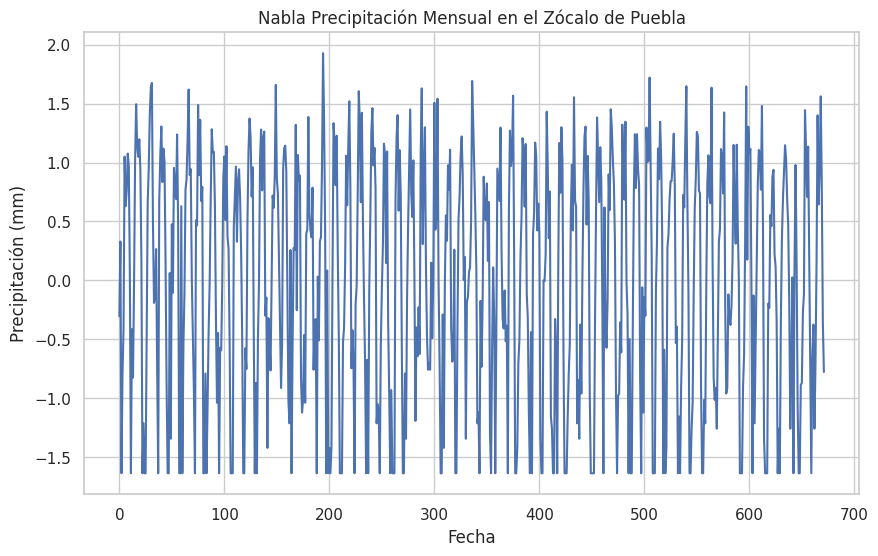

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ypre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Yeo-Johnson Estandarizado Precipitación Mensual en el Zócalo de Puebla")
plt.grid(True)
plt.show()

# **ESTACIONARIEDAD**

In [10]:
from statsmodels.tsa.stattools import adfuller

In [85]:
adfuller(ypre)

(np.float64(-7.092601622125712),
 np.float64(4.370937974226262e-10),
 17,
 654,
 {'1%': np.float64(-3.440388459298194),
  '5%': np.float64(-2.8659694611921034),
  '10%': np.float64(-2.569128861019929)},
 np.float64(1158.2583743431305))

In [ ]:
estacionariedad = adfuller(ypre)

if estacionariedad[1] < 0.05:
    print("La serie es estacionaria", estacionariedad[1])

La serie es estacionaria 4.370937974226262e-10


## **AUTOCORRELACIONES**

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
import matplotlib.pyplot as plt

### **Autocorrelaciones Simples**

In [15]:
autocorr_values = acf(pre, nlags=24)    # get the autocorrelations
autocorr_values = autocorr_values[1:]   # drop the first value (lag 0)

print(autocorr_values)

[ 0.50839258  0.23418155  0.01313411 -0.30708039 -0.52560174 -0.57512638
 -0.45457715 -0.24676928  0.05574702  0.28668487  0.51873702  0.62104148
  0.4223674   0.18726716 -0.05027177 -0.31533739 -0.51101384 -0.52356076
 -0.41372522 -0.19536916  0.07490439  0.29360553  0.49171041  0.55390038]


In [16]:
acf(pre, nlags=24)[1:] 

array([ 0.50839258,  0.23418155,  0.01313411, -0.30708039, -0.52560174,
       -0.57512638, -0.45457715, -0.24676928,  0.05574702,  0.28668487,
        0.51873702,  0.62104148,  0.4223674 ,  0.18726716, -0.05027177,
       -0.31533739, -0.51101384, -0.52356076, -0.41372522, -0.19536916,
        0.07490439,  0.29360553,  0.49171041,  0.55390038])

In [17]:
def significancia(N, rhos):
    return 2 * np.sqrt(1 / (N) * (1 + 2 * sum(rho**2 for rho in rhos)))

In [18]:
def FAC(N: int, rhos: list, print_rhos: bool = False) -> list:
    """
    Nos da la lista de los rhos significativos
    """
    significativos = []
    rho_list = [0] * len(rhos)
    
    updated_rhos = list(rho_list)  # Copy to retain original values when updating
    for i, r in enumerate(rhos):  # for index, rho in enumerate(r_list):
        threshold_value = significancia(N, updated_rhos)    # se actualiza el valor con los rhos significativos
        if abs(r) > threshold_value:
            if print_rhos: 
                print(f"rho {i+1} es significativo")
                print(f"{abs(r)} > {threshold_value}\n")

            updated_rhos[i] = r
            significativos.append((r, i+1))
        else:
            if print_rhos: 
                print(f"rho {i+1} no es significativo")
                print(f"{abs(r)} < {threshold_value}\n")

    print("Valores de autocorrelacion significativos:")
    for val, i in significativos:
        print(f"r{i}: {val}")

    return updated_rhos, significativos

In [19]:
val_autocorr_sig, autocorr_sig = FAC(len(pre), autocorr_values) # Valores de autocorrelacion significativos, Autocorrelaciones significativas

Valores de autocorrelacion significativos:
r1: 0.5083925816973087
r2: 0.23418154549209602
r4: -0.30708039075409777
r5: -0.525601739269851
r6: -0.5751263827263251
r7: -0.4545771512790851
r8: -0.2467692768389855
r10: 0.28668487207593624
r11: 0.518737019797207
r12: 0.62104147830531
r13: 0.4223673959805745
r14: 0.18726715812704875
r16: -0.3153373882900101
r17: -0.5110138375479142
r18: -0.523560757866975
r19: -0.4137252180674527
r22: 0.29360552614549634
r23: 0.49171040803243543
r24: 0.5539003811525876


### **Autocorrelaciones Simples**

In [20]:
pacf_values = pacf(pre, nlags=24)
pacf_values = pacf_values[1:]       # drop the first value (lag 0)
print(pacf_values)

[ 0.50915025 -0.03287594 -0.12647798 -0.35612797 -0.33894795 -0.27403763
 -0.13857567 -0.08223542  0.05576356  0.01318253  0.19534353  0.25851008
  0.02594096 -0.00088725  0.01740651 -0.00537288 -0.06427178 -0.05420949
 -0.07395753 -0.03629151 -0.02303549 -0.04347716  0.04677814  0.11135938]


In [21]:
def intervalo(N):
    "Esta es de las autocorrelaciones parciales"
    return 2*np.sqrt(1/ N)

In [22]:
def FACP(N: int, rho_list: list, print_rhos: bool = False) -> list:
    """
    Esta función nos da la lista de los rhos significativos
    """
    
    fueradelintervalo = intervalo(N)
    significativos = []

    for i, r in enumerate(rho_list):
        
        if abs(r) > fueradelintervalo:
            if print_rhos: 
                print(f"rho {i+1} es significativo")
                print(f"{abs(r)} > {fueradelintervalo}\n")
            significativos.append((r, i+1))
        else:
            if print_rhos: 
                print(f"rho {i+1} no es significativo")
                print(f"{abs(r)} < {fueradelintervalo}\n")
                pass

    print(f"Valores de autocorrelacion parcial significativos:")
    for r, i in significativos:
        print(f"rho {i}: {r}")

    return significativos

In [23]:
facp_sig = FACP(len(pre), pacf_values)

Valores de autocorrelacion parcial significativos:
rho 1: 0.5091502457534897
rho 3: -0.12647798109479702
rho 4: -0.3561279660010308
rho 5: -0.3389479485953009
rho 6: -0.2740376325288502
rho 7: -0.13857567141649174
rho 8: -0.0822354191788456
rho 11: 0.19534353456529419
rho 12: 0.2585100818536459
rho 24: 0.11135938181397906


## **plot**

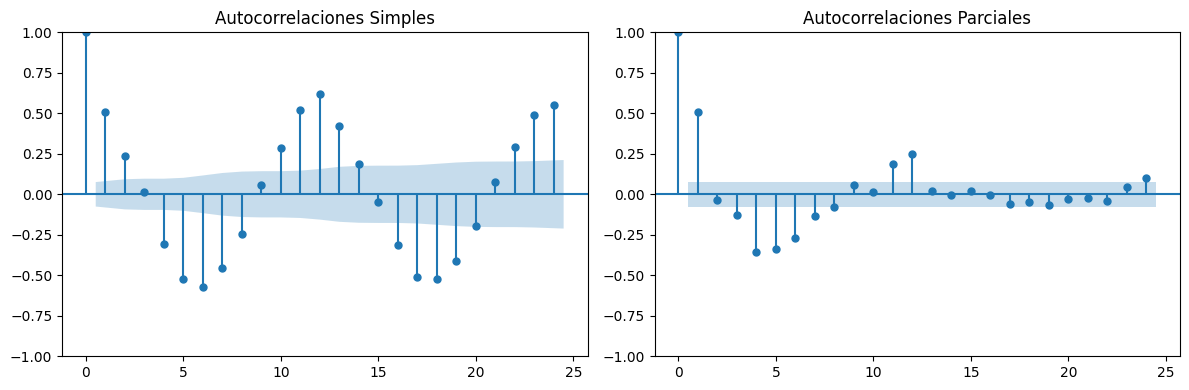

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(pre, lags=24, ax=axs[0])
# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(pre, lags=24, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')

plt.tight_layout()
plt.show()


In [25]:
fac = FAC(len(pre), acf(pre, nlags=24)[1:] )

Valores de autocorrelacion significativos:
r1: 0.5083925816973087
r2: 0.23418154549209602
r4: -0.30708039075409777
r5: -0.525601739269851
r6: -0.5751263827263251
r7: -0.4545771512790851
r8: -0.2467692768389855
r10: 0.28668487207593624
r11: 0.518737019797207
r12: 0.62104147830531
r13: 0.4223673959805745
r14: 0.18726715812704875
r16: -0.3153373882900101
r17: -0.5110138375479142
r18: -0.523560757866975
r19: -0.4137252180674527
r22: 0.29360552614549634
r23: 0.49171040803243543
r24: 0.5539003811525876


In [26]:
facp = FACP(len(pre), pacf(pre, nlags=24)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: 0.5091502457534897
rho 3: -0.12647798109479702
rho 4: -0.3561279660010308
rho 5: -0.3389479485953009
rho 6: -0.2740376325288502
rho 7: -0.13857567141649174
rho 8: -0.0822354191788456
rho 11: 0.19534353456529419
rho 12: 0.2585100818536459
rho 24: 0.11135938181397906


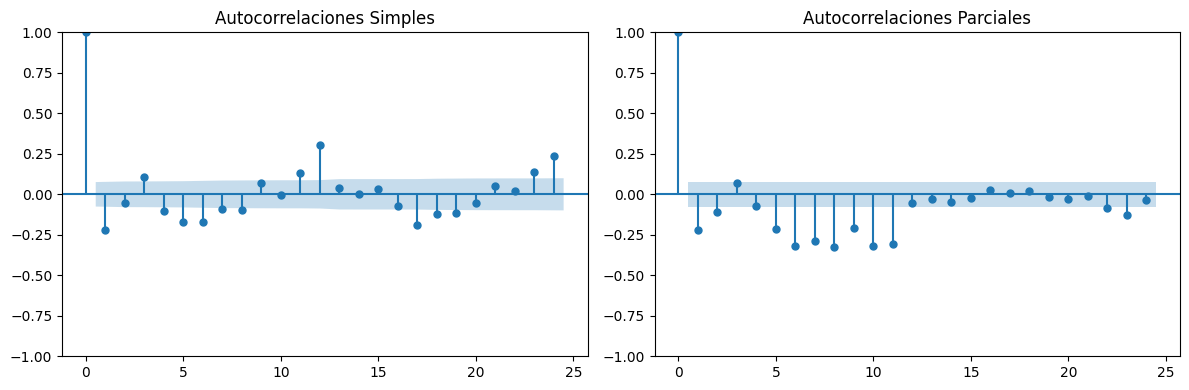

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(dpre, lags=24, ax=axs[0])
# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(dpre, lags=24, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')

plt.tight_layout()
plt.show()


In [28]:
fac = FAC(len(dpre), acf(dpre, nlags=24)[1:] )

Valores de autocorrelacion significativos:
r1: -0.2208552382670342
r3: 0.10390830525106899
r4: -0.1059125095712042
r5: -0.17103827520973158
r6: -0.1718202191019502
r7: -0.09179592411826668
r8: -0.09629819587421846
r11: 0.13167076342070386
r12: 0.30671463810829047
r17: -0.1866969636398212
r18: -0.12361634021919927
r19: -0.1137327163527698
r23: 0.13844098837093044
r24: 0.2342564653224264


In [29]:
facp = FACP(len(dpre), pacf(dpre, nlags=24)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: -0.2211848729510148
rho 2: -0.10774677077439372
rho 5: -0.21590129461409885
rho 6: -0.31940094915194445
rho 7: -0.2955195914988785
rho 8: -0.3311470047776021
rho 9: -0.21864855964375957
rho 10: -0.33370702935859453
rho 11: -0.34113912250088857
rho 12: -0.09392430761753182
rho 14: -0.08270696913668539
rho 22: -0.10215395355867311
rho 23: -0.15928203014308878


## **MODELADO**

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [91]:
modelo=SARIMAX(ypre,
               order=(1,0,0),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -655.019
Date:                              Tue, 22 Apr 2025   AIC                           1318.039
Time:                                      18:15:50   BIC                           1336.080
Sample:                                           0   HQIC                          1325.026
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3193      0.034      9.500      0.000       0.253       0.385
ar.S.L12       0.9216      0.020     46.228      0.000       0.883       0.961
ma.S.L12      -0.6034      0.041    -14.603      0.000      -0.684      -0.522
sigma2         0.4060      0.021     19.147      0.000       0.364       0.448
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                21.53
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.41
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

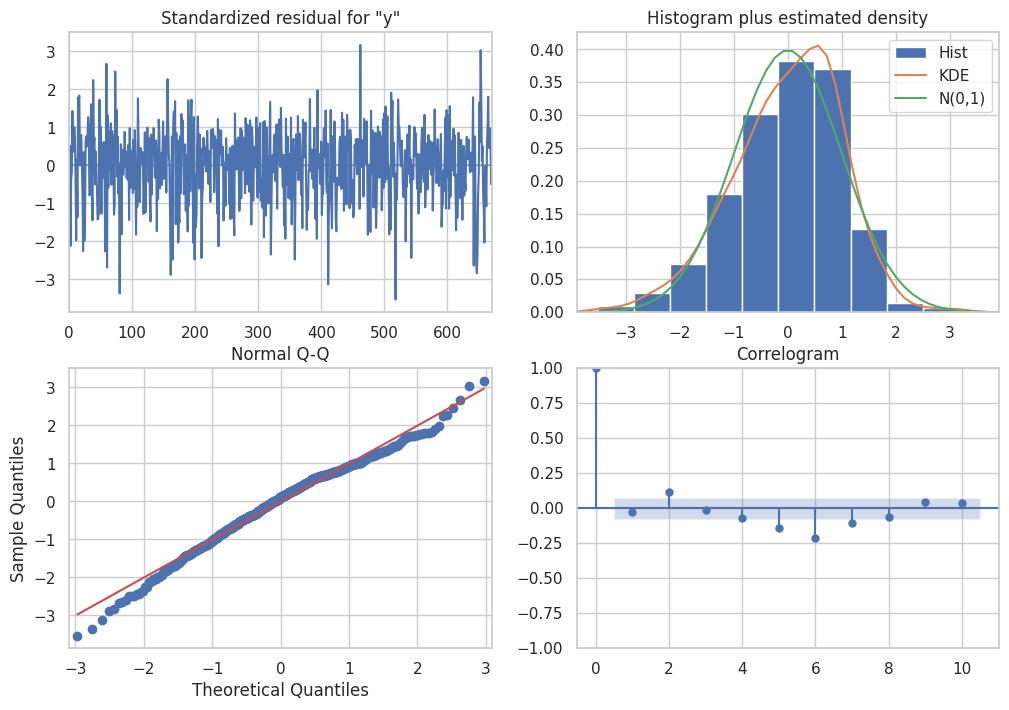

In [92]:
diagnostic = modelo.plot_diagnostics(figsize=(12, 8))
plt.show()

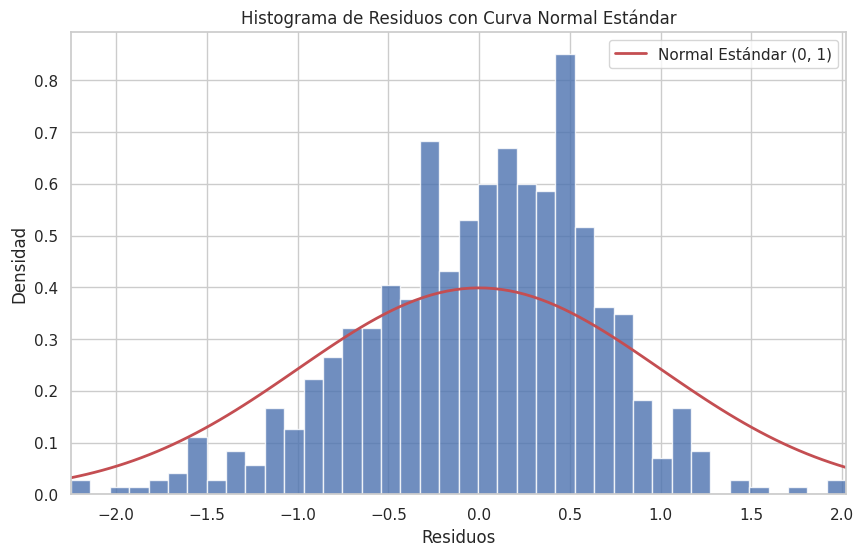

In [103]:
# Importar la función para la distribución normal
from scipy.stats import norm
import numpy as np

# Graficar el histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(modelo.resid, bins=40, density=True, alpha=0.8, edgecolor='white')

# Generar valores para la curva normal estándar
x = np.linspace(modelo.resid.min(), modelo.resid.max(), 100)
normal_pdf = norm.pdf(x, loc=0, scale=1)  # Media 0, desviación estándar 1

# Graficar la curva normal estándar
plt.plot(x, normal_pdf, 'r-', lw=2, label='Normal Estándar (0, 1)')

# Etiquetas y leyenda
plt.title("Histograma de Residuos con Curva Normal Estándar")
plt.xlabel("Residuos")
plt.ylabel("Densidad")
plt.xlim(modelo.resid.min(), modelo.resid.max())
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# **Ul mejor modelo SARIMA**

In [45]:
import pmdarima as pm

# Find the best SARIMA model
auto_sarima_model = pm.auto_arima(zpre, 
                                  seasonal=True, 
                                  m=12,  # Monthly data, so seasonality is 12
                                  stepwise=True, 
                                  suppress_warnings=True, 
                                  trace=True)

# Display the summary of the best model
auto_sarima_model.summary()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [96]:
modelo=SARIMAX(ypre,
               order=(1,0,0),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -655.019
Date:                              Tue, 22 Apr 2025   AIC                           1318.039
Time:                                      18:18:18   BIC                           1336.080
Sample:                                           0   HQIC                          1325.026
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3193      0.034      9.500      0.000       0.253       0.385
ar.S.L12       0.9216      0.020     46.228      0.000       0.883       0.961
ma.S.L12      -0.6034      0.041    -14.603      0.000      -0.684      -0.522
sigma2         0.4060      0.021     19.147      0.000       0.364       0.448
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                21.53
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.41
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

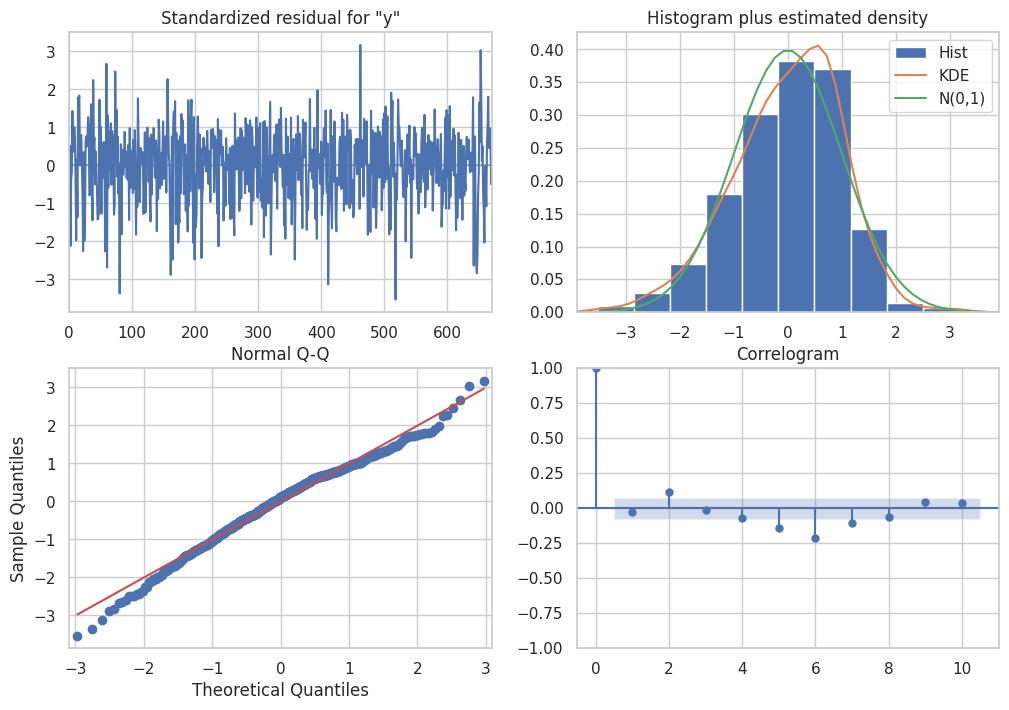

In [97]:
diagnostic = modelo.plot_diagnostics(figsize=(12, 8))
plt.show()

In [98]:
residuos = modelo.resid

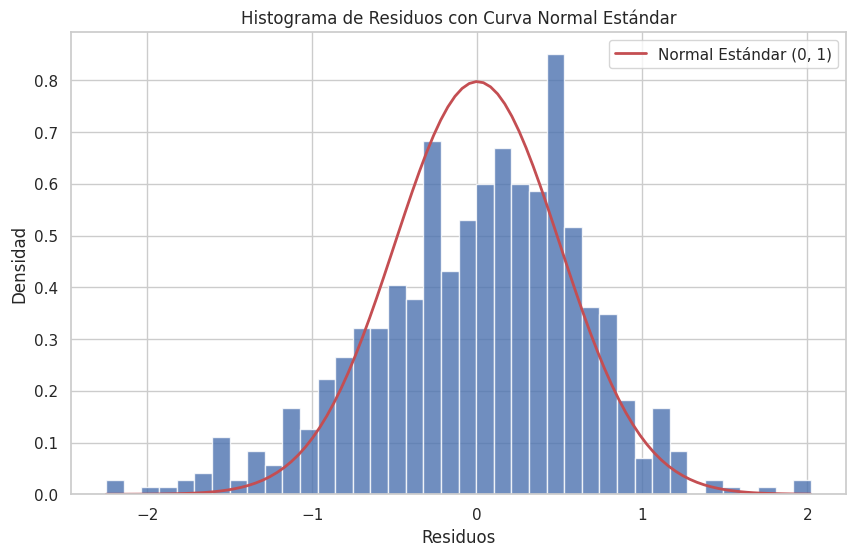

In [104]:
# Importar la función para la distribución normal
from scipy.stats import norm
import numpy as np


# Graficar KDE de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=40, density=True, alpha=0.8, edgecolor='white')

# Generar valores para la curva normal estándar
x = np.linspace(modelo.resid.min(), modelo.resid.max(), 100)
normal_pdf = norm.pdf(x, loc=0, scale=0.5)  # Media 0, desviación estándar 1

# Graficar la curva normal estándar
plt.plot(x, normal_pdf, 'r-', lw=2, label='Normal Estándar (0, 1)')

# Etiquetas y leyenda
plt.title("Histograma de Residuos con Curva Normal Estándar")
plt.xlabel("Residuos")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [105]:
ypre

array([[-3.04269903e-01],
       [ 3.30105704e-01],
       [-1.63583355e+00],
       [-8.03028254e-01],
       [-4.07722913e-01],
       [ 1.05063639e+00],
       [ 6.30221288e-01],
       [ 7.60392908e-01],
       [ 1.07602745e+00],
       [ 9.68415796e-01],
       [ 4.08209065e-02],
       [-1.63583355e+00],
       [-4.13892396e-01],
       [-8.24115048e-01],
       [-2.00229030e-02],
       [ 1.01902095e+00],
       [ 1.49491570e+00],
       [ 1.13956887e+00],
       [ 1.04928224e+00],
       [ 1.19670779e+00],
       [ 9.41603541e-01],
       [ 1.72626346e-01],
       [-1.63583355e+00],
       [-1.21218689e+00],
       [-1.63583355e+00],
       [-1.63583355e+00],
       [-5.12233911e-01],
       [ 6.58630760e-01],
       [ 9.55101245e-01],
       [ 1.41187803e+00],
       [ 1.63735169e+00],
       [ 1.67563566e+00],
       [ 4.89027873e-01],
       [-1.90373101e-01],
       [-1.27836097e-01],
       [ 2.65921701e-01],
       [-7.51331900e-01],
       [-1.63583355e+00],
       [ 6.8

In [106]:
# Pronóstico para 12 meses hacia el futuro
forecast = modelo.forecast(steps=12)

In [107]:
# Obtener pronóstico con intervalos
pred = modelo.get_forecast(steps=12)

In [108]:
# Media pronosticada
forecast_mean = pred.predicted_mean
forecast_mean

array([-0.35474452, -0.18927049, -0.69571159, -0.6953434 , -0.26449793,
        0.46613285,  0.15312303,  0.45273064,  0.93327852,  0.46863716,
       -0.21817362, -0.58415447])

In [109]:
# Intervalos de confianza
int_conf = pred.conf_int()
int_conf

array([[-1.60355908,  0.89407005],
       [-1.50019236,  1.12165138],
       [-2.01280016,  0.62137699],
       [-2.01305899,  0.62237218],
       [-1.58227742,  1.05328155],
       [-0.85165315,  1.78391884],
       [-1.16466363,  1.47090969],
       [-0.86505609,  1.77051737],
       [-0.38450821,  2.25106526],
       [-0.84914958,  1.7864239 ],
       [-1.53596036,  1.09961312],
       [-1.9019412 ,  0.73363227]])

In [115]:
forecast_mean.reshape(-1, 1)

array([[-0.35474452],
       [-0.18927049],
       [-0.69571159],
       [-0.6953434 ],
       [-0.26449793],
       [ 0.46613285],
       [ 0.15312303],
       [ 0.45273064],
       [ 0.93327852],
       [ 0.46863716],
       [-0.21817362],
       [-0.58415447]])

In [ ]:
forecast_real = pt.inverse_transform(forecast_mean.reshape(-1, 1))

In [120]:
# get the lower and upper bounds
lower_bound_real = pt.inverse_transform(int_conf[:, 0].reshape(-1, 1))
upper_bound_real = pt.inverse_transform(int_conf[:, 1].reshape(-1, 1))

In [121]:
lower_bound_real

array([[  0.27044702],
       [  1.5228513 ],
       [ -1.782672  ],
       [ -1.78357756],
       [  0.47707025],
       [ 40.29981725],
       [ 12.43705889],
       [ 38.58514847],
       [144.72719312],
       [ 40.62627781],
       [  1.01467537],
       [ -1.3713023 ]])

In [122]:
upper_bound_real

array([[1385.84264573],
       [1870.05054163],
       [ 938.50335134],
       [ 939.90324252],
       [1712.87169117],
       [4026.78491872],
       [2851.50349549],
       [3969.97186054],
       [6426.43436932],
       [4037.47297496],
       [1818.23491178],
       [1106.71776314]])

In [127]:
# Generate forecast dates and plot forecast series
forecast_index = pd.date_range(start=pre.index[-2], periods=13, freq='ME')[1:]

In [131]:
forecast_index

DatetimeIndex(['2009-12-31', '2010-01-31', '2010-02-28', '2010-03-31',
               '2010-04-30', '2010-05-31', '2010-06-30', '2010-07-31',
               '2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30'],
              dtype='datetime64[ns]', freq='ME')

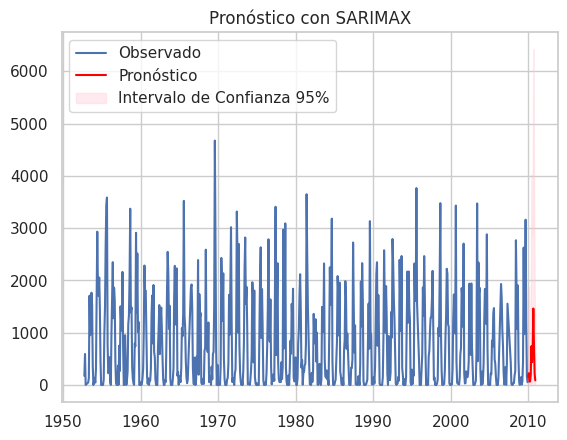

In [132]:
# Serie original
plt.plot(pre, label='Observado')

# Pronóstico
plt.plot(forecast_index, forecast_real, label='Pronóstico', color='red')    # Pronóstico en rojo

# Intervalos
plt.fill_between(forecast_index, 
                 lower_bound_real.flatten(),
                 upper_bound_real.flatten(),
                 color='pink', alpha=0.3, label='Intervalo de Confianza 95%')

plt.legend()
plt.title('Pronóstico con SARIMAX') 
plt.show()

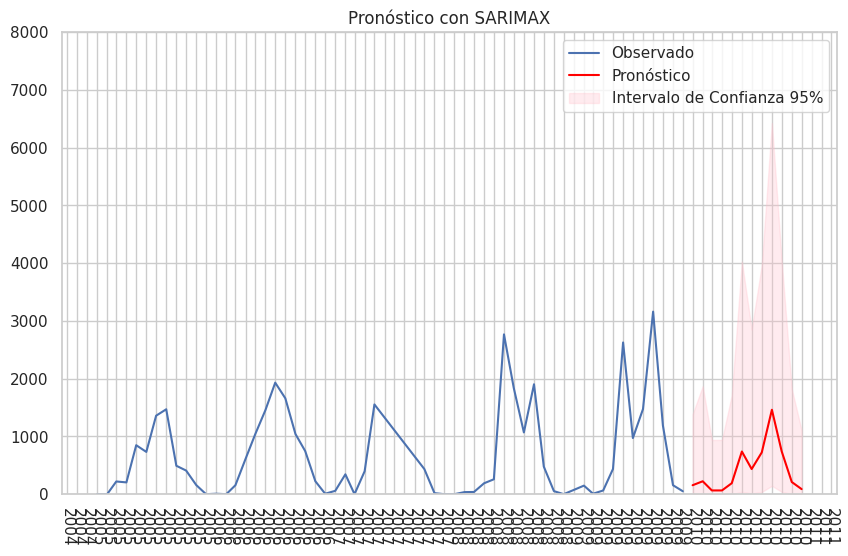

In [144]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # set ticks every month

# Filter the observed series from 2008 onward
obs = pre[pre.index >= '2005-01-01']

# Plot the observed series
plt.plot(obs, label='Observado')


plt.plot(forecast_index, forecast_real, label='Pronóstico', color='red')

# Add a red line connecting the last observed point with the first forecast point
last_obs_date = obs.index[-1]
last_obs_value = obs.iloc[-1]
first_fc_date = forecast_index[0]
first_fc_value = forecast_real[0]
# Intervalos
plt.fill_between(forecast_index, 
                 lower_bound_real.flatten(),
                 upper_bound_real.flatten(),
                 color='pink', alpha=0.3, label='Intervalo de Confianza 95%')

plt.xticks(rotation=270)
plt.legend()
plt.title('Pronóstico con SARIMAX')
plt.ylim(0, 8000)
plt.grid(True)
plt.show()

In [138]:
last_obs_value

np.int64(51)